# finding names in Harry potter books

In [24]:
#import packages
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
characters_list = pd.read_csv('../harry potter project/characters_list.csv')
harry_potter_path = '../harry potter project'

In [100]:
characters_list

,id,name,bio
0,0,Regulus Arcturus Black,Brother of Sirius. Used to be a Death Eater bu...
1,1,Sirius Black,Best friend of James Potter and godfather of H...
2,2,Lavender Brown,Killed by a werewolf. She was a gryffindor stu...
3,3,Cho Chang,Ravenclaw student who dated Cedric Diggory and...
4,4,Vincent Crabbe Sr.,Father of Crabbe and death-eater who escaped A...
...,...,...,...
60,60,Fluffy,Three-headed dog belonging to Rubeus Hagrid.
61,61,Hedwig,Harry's owl.
62,62,Moaning Myrtle,Ghost at Hogwards.
63,63,Aragog,Acromantula belonging to Rubeus Hagrid.


In [111]:
import random
# Choose a few random names
random_keywords = random.sample(list(characters_list['name']), 20)
keywords_list = random_keywords

In [112]:
keywords_list

['Hermione Granger',
 'Dudley Dursley',
 'Fred Weasley',
 'Alberforth Dumbledore',
 'Peter Pettigrew',
 'Vernon Dursley',
 'Alice Longbottom',
 'Aragog',
 'Remus Lupin',
 'Rubeus Hagrid',
 'Rita Skeeter',
 'Albus Dumbledore',
 'Frank Longbottom',
 'Nicolas Flamel',
 'Grawp',
 'Goyle Sr.',
 'Dolores Janes Umbridge',
 'Seamus Finnigan',
 'Quirinus Quirrell',
 'Nymphadora Tonks']

In [129]:
# add names & addres to 
folder_address= []
folder_names = []
for name in os.listdir(harry_potter_path):
    if name.endswith('.txt'):
        folder_names.append(name)
        folder_address.append(os.path.join(harry_potter_path, name))

In [130]:
folder_address

['../harry potter project\\Book1.txt',
 '../harry potter project\\Book2.txt',
 '../harry potter project\\Book3.txt',
 '../harry potter project\\Book4.txt',
 '../harry potter project\\Book5.txt',
 '../harry potter project\\Book6.txt',
 '../harry potter project\\Book7.txt']

In [131]:
folder_names

['Book1.txt',
 'Book2.txt',
 'Book3.txt',
 'Book4.txt',
 'Book5.txt',
 'Book6.txt',
 'Book7.txt']

In [136]:
#count the name
def count_keyword_in_file(file_path, keywords):
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()
    keyword_counts = {keyword : content.count(keyword) for keyword in keywords}
    return keyword_counts
for file_path in folder_address:
    keyword_counts = count_keyword_in_file(file_path, keywords_list)
    print(f'keyword_count in {file_path}')
    for keyword, count in keyword_counts.items():
        print(f'  {keyword}: {count}')

keyword_count in ../harry potter project\Book1.txt
  Hermione Granger: 15
  Dudley Dursley: 0
  Fred Weasley: 4
  Alberforth Dumbledore: 0
  Peter Pettigrew: 0
  Vernon Dursley: 1
  Alice Longbottom: 0
  Aragog: 0
  Remus Lupin: 0
  Rubeus Hagrid: 2
  Rita Skeeter: 0
  Albus Dumbledore: 6
  Frank Longbottom: 0
  Nicolas Flamel: 11
  Grawp: 0
  Goyle Sr.: 0
  Dolores Janes Umbridge: 0
  Seamus Finnigan: 3
  Quirinus Quirrell: 0
  Nymphadora Tonks: 0
keyword_count in ../harry potter project\Book2.txt
  Hermione Granger: 7
  Dudley Dursley: 1
  Fred Weasley: 1
  Alberforth Dumbledore: 0
  Peter Pettigrew: 0
  Vernon Dursley: 1
  Alice Longbottom: 0
  Aragog: 19
  Remus Lupin: 0
  Rubeus Hagrid: 0
  Rita Skeeter: 0
  Albus Dumbledore: 1
  Frank Longbottom: 0
  Nicolas Flamel: 0
  Grawp: 0
  Goyle Sr.: 0
  Dolores Janes Umbridge: 0
  Seamus Finnigan: 7
  Quirinus Quirrell: 0
  Nymphadora Tonks: 0
keyword_count in ../harry potter project\Book3.txt
  Hermione Granger: 1
  Dudley Dursley: 0
  

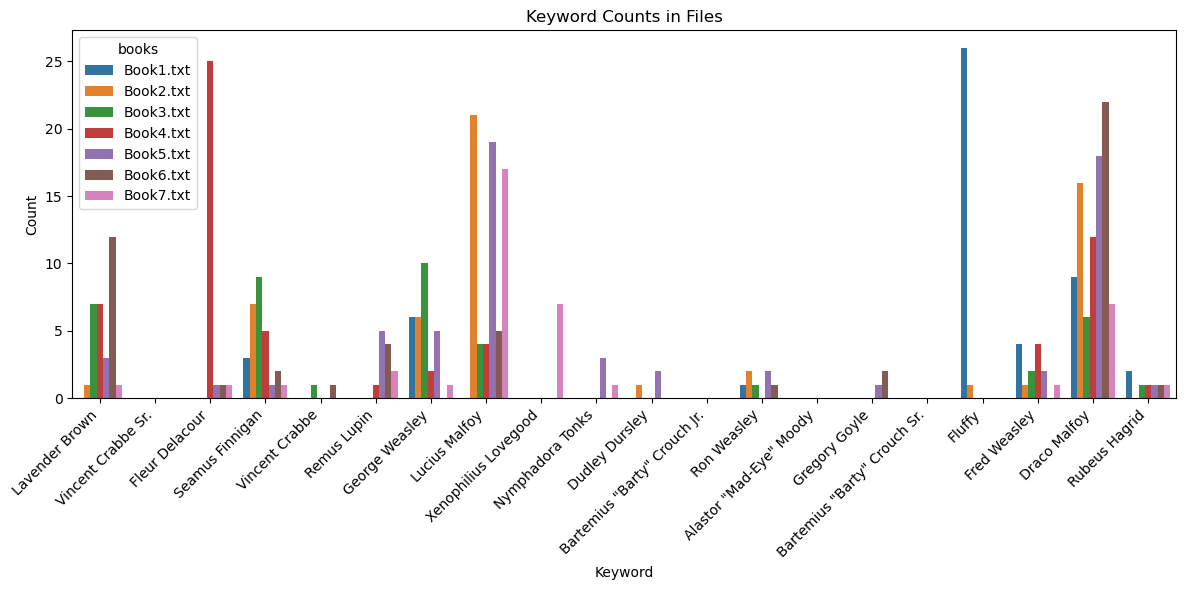

In [135]:
data = []
for file_path, file_name in zip(folder_address, folder_names):
    keyword_counts = count_keyword_in_file(file_path, keywords)
    for keyword, count in keyword_counts.items():
        data.append({'File': file_name, 'Keyword': keyword, 'Count': count})

# Convert data to data frame
df = pd.DataFrame(data)

# show the data by seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Keyword', y='Count', hue='File')
plt.xticks(rotation=45, ha='right')
plt.title('Keyword Counts in Files')
plt.ylabel('Count')
plt.xlabel('Keyword')
plt.legend(title='books')
plt.tight_layout()
plt.show()